#Лабораторная работа №1
ПРИБЛИЖЕННЫЕ МЕТОДЫ РЕШЕНИЯ НЕЛИНЕЙНЫХ СКАЛЯРНЫХ УРАВНЕНИЙ


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Программа построения таблицы значений функции

In [55]:
a = 0.1
b = 5.1
n = 10
h = (b - a)/n;

x = np.arange(a, b+h, h)
y = np.sqrt(2*x) - np.cos(x/3)

x_y = {"x": x, "y": y}
data_frame = pd.DataFrame(x_y)
print(data_frame)

      x         y
0   0.1 -0.552231
1   0.6  0.115379
2   1.1  0.549712
3   1.6  0.927737
4   2.1  1.284548
5   2.6  1.632980
6   3.1  1.978022
7   3.6  2.320924
8   4.1  2.660849
9   4.6  2.995696
10  5.1  3.322588


In [56]:
def y(x):
    return np.sqrt(2*x) - np.cos(x/3)

def dy(x):
    return np.sqrt(2)/(2*np.sqrt(x)) + (1/3)*np.sin(x/3)

def d2y(x):
    return -np.sqrt(2)/(4*x**(3/2)) + (1/6)*np.cos(x/3)

In [45]:
a = 0.1
b = 5.1
n = 10
h = (b - a)/n;

x = np.arange(a, b+h, h)
y = np.sqrt(2*x) - np.cos(x/3)
derivative_y_1 = np.sqrt(2)/(2*np.sqrt(x)) + (1/3)*np.sin(x/3)
derivative_y_2 = -np.sqrt(2)/(4*x**(3/2)) + (1/6)*np.cos(x/3)

x_y_der1_y_der2_y = {"x": x, "y": y, "y'": derivative_y_1, "y''": derivative_y_2}
data_frame = pd.DataFrame(x_y_der1_y_der2_y)
print(data_frame)

      x         y        y'        y''
0   0.1 -0.552231  2.247177 -11.013766
1   0.6  0.115379  0.979094  -0.597381
2   1.1  0.549712  0.793702  -0.150867
3   1.6  0.927737  0.728486  -0.031173
4   2.1  1.284548  0.702689   0.011295
5   2.6  1.632980  0.692587   0.023563
6   3.1  1.978022  0.687946   0.020551
7   3.6  2.320924  0.683358   0.008632
8   4.1  2.660849  0.675628  -0.008801
9   4.6  2.995696  0.662790  -0.029594
10  5.1  3.322588  0.643667  -0.052171


Программа построения графика функции

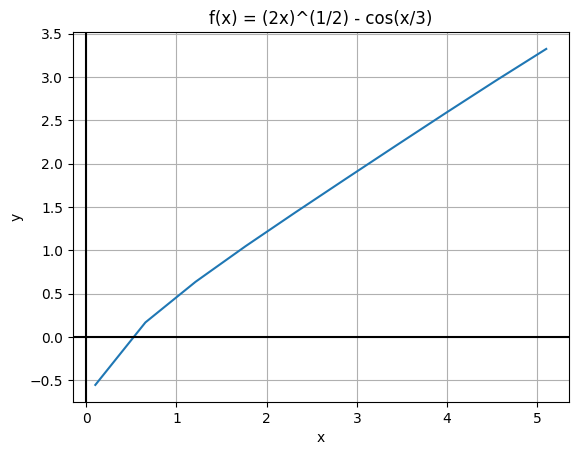

In [46]:
# Создаём экземпляр класса figure и добавляем к FIgure область Axes
fig, ax = plt.subplots()

ax.set_title('f(x) = (2x)^(1/2) - cos(x/3)')
ax.set_xlabel('x')
ax.set_ylabel('y')

x = np.linspace(0.1, 5.1, 10)
y = np.sqrt(2*x) - np.cos(x/3)

plt.plot(x, y)
plt.grid(True)

ax = plt.gca()

# plot X - axis
ax.axhline(y=0, color='k')

# plot Y - axis
ax.axvline(x=0, color='k')
plt.show()

In [87]:
#Начальное приближение
x0 = 0.1

Метод Ньютона

In [88]:
def newton_method(y, dy, x0, epsilon=1e-7):
    iteration = 0
    x1 = x0 - y(x0) / dy(x0)
    while True:
        if abs(x1 - x0) < epsilon:
          break
        iteration = iteration + 1
        print(iteration," ", x1)
        x0 = x1
        x1 = x0 - y(x0) / dy(x0)
    return x1

In [97]:
new = newton_method(y, dy, x0)

1   0.34574427948368314
2   0.4761409859777111
3   0.4868906709366968
4   0.48694234154490607


Метод хорд

In [91]:
def chord_method(y, a, b, eps=1e-7):
    iteration = 0
    x0 = a
    while True:
      x1 = a - (y(a)*(a - b))/y(a) - y(b)

      if np.abs(x0 - x1) < eps:
            return x1

      if y(a)*y(x1) < 0:
        b = x1
      else:
        a = x1

      iteration = iteration + 1
      print(iteration," ", x1)

      x0 = x1

In [100]:
c = chord_method(y, a, b)
print(y(new), " ", y(c))

1   1.777411621170213
2   0.7215513641398315
3   0.4914741802050925
4   0.48664737343473097
0.0   -0.00031482775167002153
